In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import bleach
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset (using the downloaded file)
theft = pd.read_csv("emscad.csv")

In [3]:
# Displaying the initial 5 records of loaded data 
theft.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


# Data Cleaning & Data Pre-Processing

## Datatypes of each column in the dataset

In [4]:
data_types = theft.dtypes

# Print the result
print("Data types of each column:")
print(data_types)


Data types of each column:
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting          object
has_company_logo       object
has_questions          object
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent             object
in_balanced_dataset    object
dtype: object


## Finding the missing values in dataset

In [5]:
missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)


Number of missing values in each column:
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64


<Figure size 1000x600 with 0 Axes>

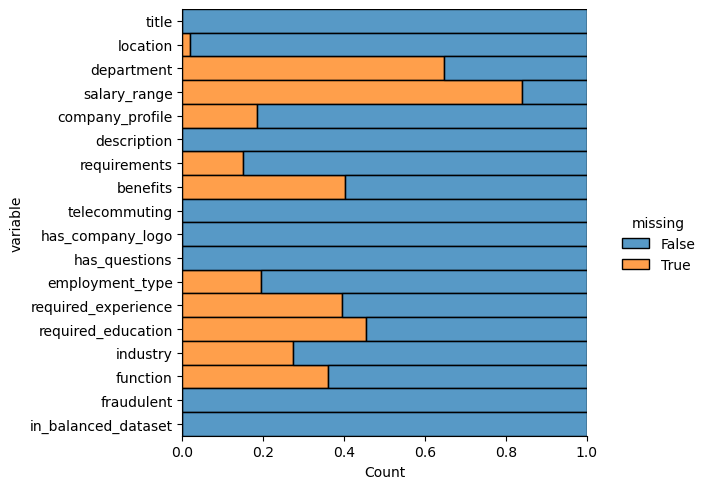

In [6]:
plt.figure(figsize=(10,6))
sns.displot(
    data=theft.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

## Handling the missing values or 'NAN'

## Imputation technique

### Column: Location

In [7]:
# Fill missing values in 'location' with 'not specified'
theft['location'].fillna('Not specified', inplace=True)


### Column: Department


In [8]:
# Calculate the mode of the 'department' column
mode_department = theft['department'].mode()[0]

# Replace missing values with the mode
theft['department'].fillna(mode_department, inplace=True)

### Column: Salary Range


In [9]:
theft['salary_range'].fillna('0', inplace=True)


### Column: Company profile


In [10]:
theft['company_profile'].fillna('Not Specified', inplace=True)


### Column: Requirements


In [11]:
theft['requirements'].fillna('Not Specified', inplace=True)


### Column: Benefits


In [12]:
theft['benefits'].fillna('Not Specified', inplace=True)


### Column: Employment Type


In [13]:
# Calculate the mode of the column
mode_employment_type = theft['employment_type'].mode()[0]

# Replace missing values with the mode
theft['employment_type'].fillna(mode_employment_type, inplace=True)


### Column: Required Experience


In [14]:
# Calculate the mode of the column
mode_exp = theft['required_experience'].mode()[0]

# Replace missing values with the mode
theft['required_experience'].fillna(mode_exp, inplace=True)

### Column: Required Education


In [15]:
theft['required_education'].fillna('Not Specified', inplace=True)


### Column: Industry


In [16]:
# Calculate the mode of the column
mode_industry = theft['industry'].mode()[0]

# Replace missing values with the mode
theft['industry'].fillna(mode_industry, inplace=True)

### Column: Function


In [17]:
# Calculate the mode of the column
mode_function = theft['function'].mode()[0]

# Replace missing values with the mode
theft['function'].fillna(mode_function, inplace=True)


### After imputing the missing values

In [18]:
theft.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,0,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,Not Specified,f,t,f,Other,Internship,Not Specified,Information Technology and Services,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,Not Specified,f,t,f,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",Sales,0,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
5,Accounting Clerk,"US, MD,",Sales,0,Not Specified,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,Not Specified,Not Specified,f,f,f,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,f,f
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"<p>Founded in 2009, the <b>Fonpit AG</b> rose ...",<p><b>Your Responsibilities:</b></p>\r\n<p> </...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<u...,f,t,t,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,f,f
7,Lead Guest Service Specialist,"US, CA, San Francisco",Sales,0,<p>Airenvy’s mission is to provide lucrative y...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b> You'll be able to e...,f,t,t,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,f,f
8,HP BSM SME,"US, FL, Pensacola",Sales,0,<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,Not Specified,f,t,t,Full-time,Associate,Not Specified,Information Technology and Services,Information Technology,f,f
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Sales,0,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,Not Specified,f,t,f,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,f,f


In [19]:
missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)


Number of missing values in each column:
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
in_balanced_dataset    0
dtype: int64


In [20]:
# Checking for blanks (empty strings) in all columns
for column in theft.columns:
    blank_values = theft[column].apply(lambda x: str(x).strip() == '').sum()
    print(f"Blanks in '{column}': {blank_values}")

Blanks in 'title': 0
Blanks in 'location': 0
Blanks in 'department': 6
Blanks in 'salary_range': 0
Blanks in 'company_profile': 0
Blanks in 'description': 0
Blanks in 'requirements': 0
Blanks in 'benefits': 0
Blanks in 'telecommuting': 0
Blanks in 'has_company_logo': 0
Blanks in 'has_questions': 0
Blanks in 'employment_type': 0
Blanks in 'required_experience': 0
Blanks in 'required_education': 0
Blanks in 'industry': 0
Blanks in 'function': 0
Blanks in 'fraudulent': 0
Blanks in 'in_balanced_dataset': 0


In [21]:
theft['department'].fillna('Not Specified', inplace=True)


In [22]:
# Check for values containing whitespace
for column in theft.columns:
    whitespace_values = theft[column].apply(lambda x: str(x).isspace()).sum()
    print(f"Whitespace values in '{column}': {whitespace_values}")


Whitespace values in 'title': 0
Whitespace values in 'location': 0
Whitespace values in 'department': 6
Whitespace values in 'salary_range': 0
Whitespace values in 'company_profile': 0
Whitespace values in 'description': 0
Whitespace values in 'requirements': 0
Whitespace values in 'benefits': 0
Whitespace values in 'telecommuting': 0
Whitespace values in 'has_company_logo': 0
Whitespace values in 'has_questions': 0
Whitespace values in 'employment_type': 0
Whitespace values in 'required_experience': 0
Whitespace values in 'required_education': 0
Whitespace values in 'industry': 0
Whitespace values in 'function': 0
Whitespace values in 'fraudulent': 0
Whitespace values in 'in_balanced_dataset': 0


In [23]:
theft['department'] = theft['department'].apply(lambda x: 'Not specified' if str(x).strip() == '' or str(x).isspace() else x)


In [24]:
# After replacing the blank and white space characters

In [25]:
# Checking for blanks (empty strings) in all columns
for column in theft.columns:
    blank_values = theft[column].apply(lambda x: str(x).strip() == '').sum()
    print(f"Blanks in '{column}': {blank_values}")

Blanks in 'title': 0
Blanks in 'location': 0
Blanks in 'department': 0
Blanks in 'salary_range': 0
Blanks in 'company_profile': 0
Blanks in 'description': 0
Blanks in 'requirements': 0
Blanks in 'benefits': 0
Blanks in 'telecommuting': 0
Blanks in 'has_company_logo': 0
Blanks in 'has_questions': 0
Blanks in 'employment_type': 0
Blanks in 'required_experience': 0
Blanks in 'required_education': 0
Blanks in 'industry': 0
Blanks in 'function': 0
Blanks in 'fraudulent': 0
Blanks in 'in_balanced_dataset': 0


In [26]:
# Check for values containing whitespace
for column in theft.columns:
    whitespace_values = theft[column].apply(lambda x: str(x).isspace()).sum()
    print(f"Whitespace values in '{column}': {whitespace_values}")

Whitespace values in 'title': 0
Whitespace values in 'location': 0
Whitespace values in 'department': 0
Whitespace values in 'salary_range': 0
Whitespace values in 'company_profile': 0
Whitespace values in 'description': 0
Whitespace values in 'requirements': 0
Whitespace values in 'benefits': 0
Whitespace values in 'telecommuting': 0
Whitespace values in 'has_company_logo': 0
Whitespace values in 'has_questions': 0
Whitespace values in 'employment_type': 0
Whitespace values in 'required_experience': 0
Whitespace values in 'required_education': 0
Whitespace values in 'industry': 0
Whitespace values in 'function': 0
Whitespace values in 'fraudulent': 0
Whitespace values in 'in_balanced_dataset': 0


## Checking for the missing values after imputing the missing values, blanks and whitespaces

In [27]:
missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)


Number of missing values in each column:
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
in_balanced_dataset    0
dtype: int64


## Checking the duplicate rows in the dataset

In [28]:
# Check for duplicate rows in the entire DataFrame
duplicates = theft.duplicated()

# Display the rows that are duplicates
duplicate_rows = theft[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Duplicate rows:
                                                   title             location  \
146                          Customer Service Associate        US, TX, Dallas   
402                      Inside Sales Professional-Omaha        US, NE, Omaha   
495               Customer Service Associate - Part Time  US, IL, Warrenville   
1327                     Recruiter/Recruiting Assistant     US, CA, Inglewood   
1572                          Telemarketing professional   US, MA, Wilmington   
...                                                  ...                  ...   
17591  Home Based Payroll Typist/Data Entry Clerks Po...   US, MT, Absarokee    
17612             Urgent Jobs (Part Time Workers Needed)      AU, NSW, Sydney   
17620  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   
17742  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   
17791  Data Entry Admin/Clerical Positions - Work Fro...        US, NE, Omaha   

      depar

In [29]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 239


## Dropping the duplicate rows

In [30]:
# Remove duplicate rows and keep the first occurrence
theft = theft.drop_duplicates(keep='first')


In [31]:
# Check for the duplicates after dropping

In [32]:
# Check for duplicate rows in the entire DataFrame
duplicates = theft.duplicated()

# Display the rows that are duplicates
duplicate_rows = theft[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent, in_balanced_dataset]
Index: []


In [33]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Splitting columns

#### 1. "Location" column:  
#### a. Splitting the data in location column to country, state and city using ',' as a delimiter

In [34]:
# Splitting the 'location' column into 'country', 'state', and 'city'
split_location = theft['location'].str.split(', ', expand=True)

# Assigning the split values to new columns
theft['country'] = split_location[0]
theft['state'] = split_location[1]
theft['city'] = split_location[2]

In [35]:
theft['city'].value_counts()

                   1620
London             1053
New York            656
Athens              542
San Francisco       475
                   ... 
Insch                 1
Council Bluffs        1
Cranberry             1
Hillside              1
los Angeles           1
Name: city, Length: 2339, dtype: int64

In [36]:
theft['state'].value_counts()

       2109
CA     2022
NY     1230
LND     991
TX      959
       ... 
ENF       1
D         1
061       1
82        1
NLE       1
Name: state, Length: 325, dtype: int64

In [37]:
theft['country'].value_counts()

US    10493
GB     2336
GR      939
CA      448
DE      382
      ...  
SI        1
CO        1
SD        1
UG        1
KH        1
Name: country, Length: 91, dtype: int64

#### b. Dropping the 'location' column

In [38]:
# Deleting the 'location' column
theft.drop(columns=['location'], inplace=True)

## Removing HTML tags

#### 2. "Company_Profile", "Description", "Requirements", and "Benefits" columns: Removing the HTML contents/tags from these columns

In [39]:
# Defining a function to remove HTML tags
def remove_html_tags(text):
    try:
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    except:
        return text  # Return the text as is in case of any parsing errors

In [40]:
# Appling the remove_html_tags function to the above specified columns
theft['company_profile'] = theft['company_profile'].apply(remove_html_tags)
theft['description'] = theft['description'].apply(remove_html_tags)
theft['requirements'] = theft['requirements'].apply(remove_html_tags)
theft['benefits'] = theft['benefits'].apply(remove_html_tags)

## Adding binary labels to the columns

#### 3. "Telecommuting", "Has_Company_Logo", "Has_Questions", "Fraudulent", and "In_Balanced_Dataset"columns: Assigning the binary labels, if the columns have 't' then '1' is assigned and if the columns have 'f' then '0' is assigned

In [41]:
# Defining a function to assign binary labels
def replace_column_values(df, columns_to_replace, value_mapping):
    for column in columns_to_replace:
        df[column] = df[column].replace(value_mapping)

In [42]:
# Specifying the columns to replace and mapping the binary values
columns_to_replace = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'in_balanced_dataset']
value_mapping = {'f': 0, 't': 1}

In [43]:
# Calling the function to replace values in specified columns
replace_column_values(theft, columns_to_replace, value_mapping)

In [44]:
## Checking the missing values again

missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)

Number of missing values in each column:
title                    0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
in_balanced_dataset      0
country                  0
state                  434
city                   434
dtype: int64


In [45]:
theft.head(4)

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,country,state,city
0,Marketing Intern,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",\nExperience with content management systems a...,Not Specified,0,1,0,Other,Internship,Not Specified,Information Technology and Services,Marketing,0,0,US,NY,New York
1,Customer Service - Cloud Video Production,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:\nYour key responsibil...,What you will get from us\nThrough being part ...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),Sales,0,\nValor Services provides Workforce Solutions ...,"Our client, located in Houston, is actively se...",\nImplement pre-commissioning and commissionin...,Not Specified,0,1,0,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,0,0,US,IA,Wever
3,Account Executive - Washington DC,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"\n\nEDUCATION: Bachelor’s or Master’s in GIS, ...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,US,DC,Washington


In [46]:
## Checking the missing values again

missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)

Number of missing values in each column:
title                    0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
in_balanced_dataset      0
country                  0
state                  434
city                   434
dtype: int64


In [47]:
theft['state'].fillna('NA', inplace=True)
theft['city'].fillna('NA', inplace=True)


In [48]:
## Checking the missing values again

missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)

Number of missing values in each column:
title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
in_balanced_dataset    0
country                0
state                  0
city                   0
dtype: int64


In [49]:
theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17641 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17641 non-null  object
 1   department           17641 non-null  object
 2   salary_range         17641 non-null  object
 3   company_profile      17641 non-null  object
 4   description          17641 non-null  object
 5   requirements         17641 non-null  object
 6   benefits             17641 non-null  object
 7   telecommuting        17641 non-null  int64 
 8   has_company_logo     17641 non-null  int64 
 9   has_questions        17641 non-null  int64 
 10  employment_type      17641 non-null  object
 11  required_experience  17641 non-null  object
 12  required_education   17641 non-null  object
 13  industry             17641 non-null  object
 14  function             17641 non-null  object
 15  fraudulent           17641 non-null  int64 
 16  in_b

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


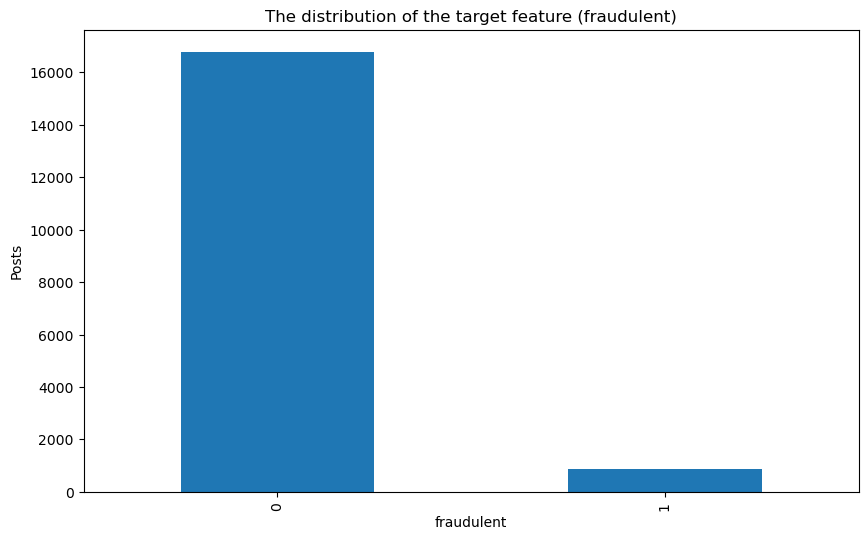

In [53]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False  # Disable the use of Unicode minus

# Bar Chart for the Target Feature
plt.figure(figsize=(10, 6))
theft['fraudulent'].value_counts().plot(kind='bar')
plt.title('The distribution of the target feature (fraudulent)')
plt.xlabel('fraudulent')
plt.ylabel('Posts')
plt.show()



## Random Oversampling

In [54]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


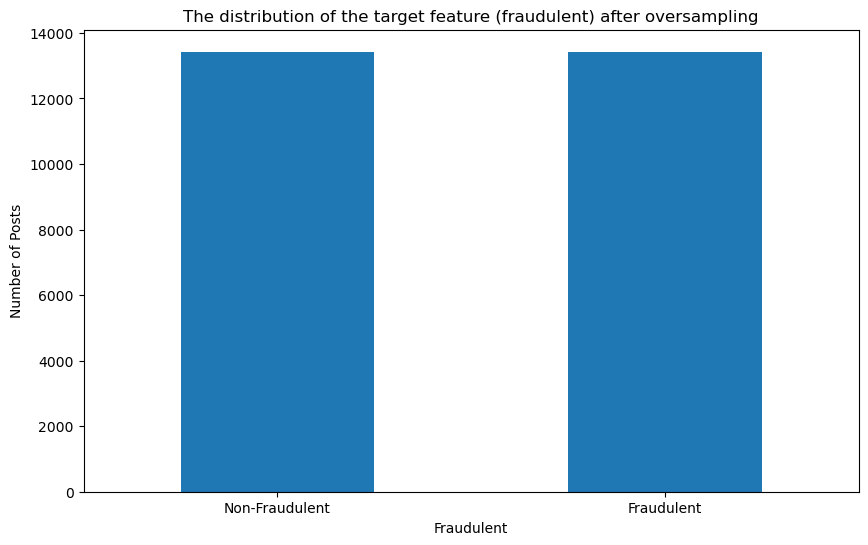

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

X = theft.drop('fraudulent', axis=1)  # Features
y = theft['fraudulent']                # Target variable

# Convert 'fraudulent' to numeric, handling possible non-numeric values
y = pd.to_numeric(y, errors='coerce')

# Impute NaN values in features (X)
X = X.fillna(X.mean())  

# Impute NaN values in the target variable (y)
y = y.fillna(y.mean())  
# Convert 'fraudulent' to integer
y = y.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training set to balance it
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

plt.figure(figsize=(10, 6))
y_ros.value_counts().plot(kind='bar')
plt.title('The distribution of the target feature (fraudulent) after oversampling')
plt.xlabel('Fraudulent')
plt.ylabel('Number of Posts')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()


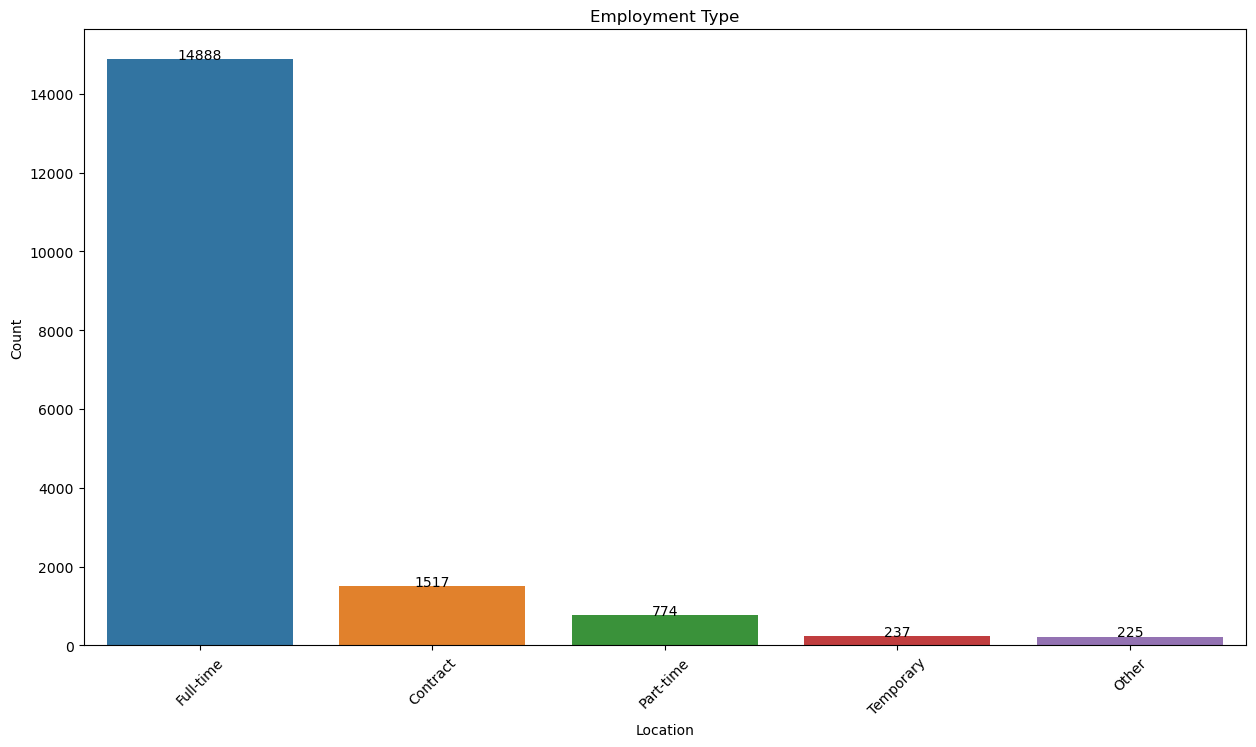

In [57]:
# plotting a bar chart to show frequency of jobs in a particular employment type
labels=theft['employment_type'].value_counts().index[:10]
values=theft['employment_type'].value_counts().values[:10]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("Employment Type")
plt.ylabel("Count")
plt.xlabel("Location")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i],ha="center")

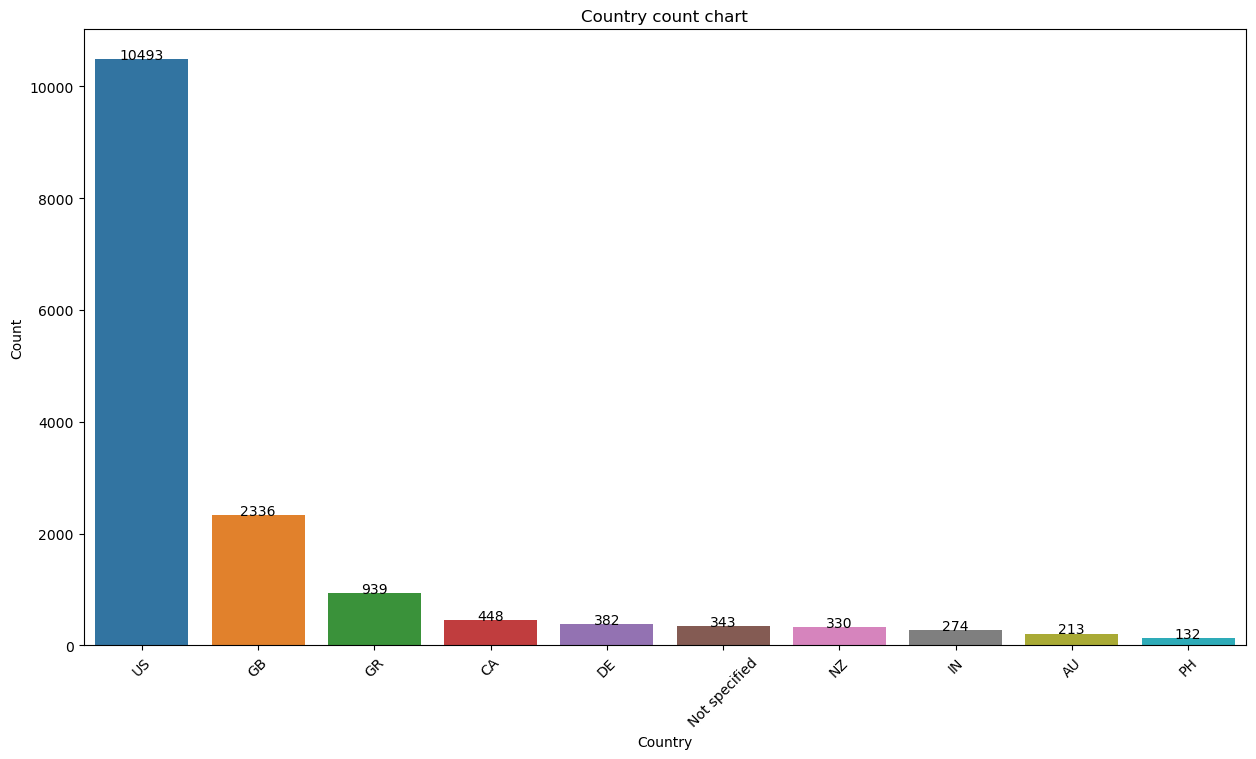

In [58]:
# plotting a bar chart to show frequency of jobs in a particular state
labels=theft['country'].value_counts().index[:10]
values=theft['country'].value_counts().values[:10]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("Country count chart")
plt.ylabel("Count")
plt.xlabel("Country")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i],ha="center")

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


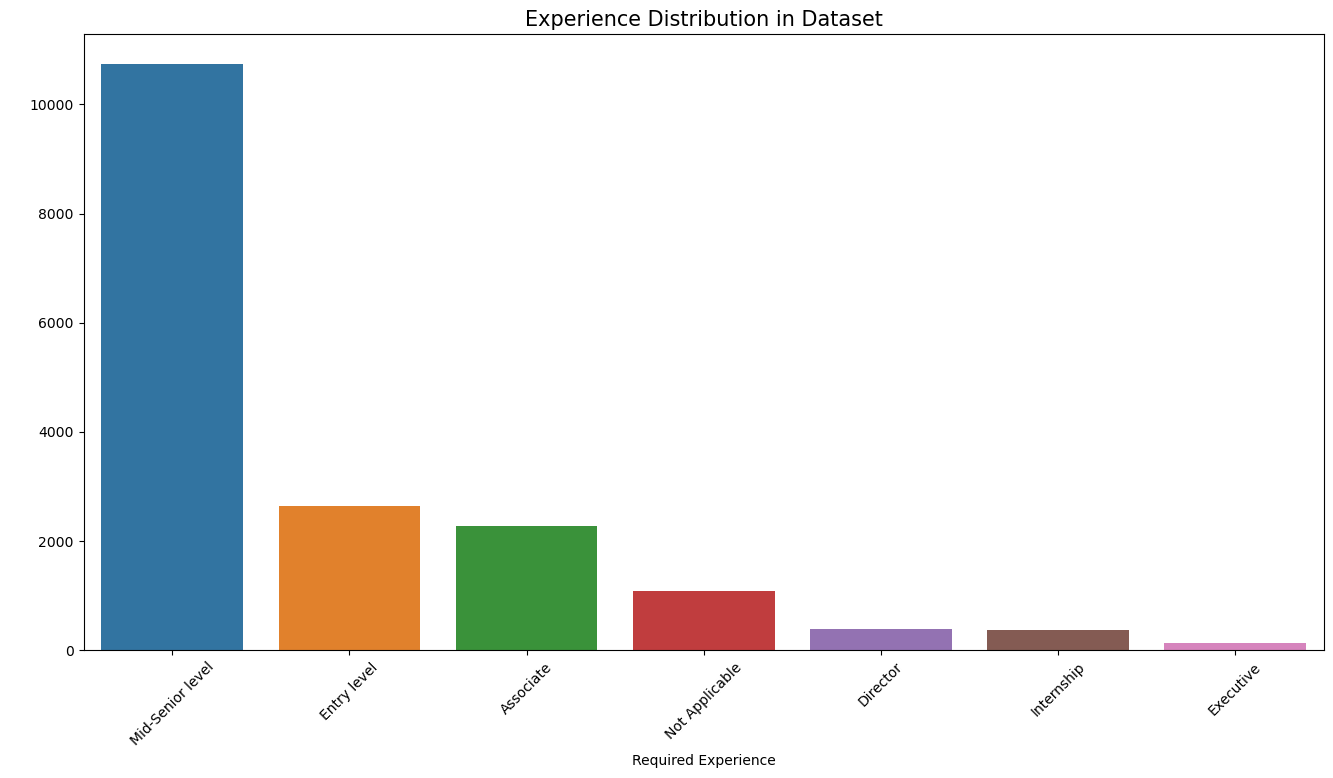

In [59]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='required_experience', data=theft, order=theft['required_experience'].value_counts().index)
ax.set_ylabel(' ')
ax.set_xlabel('Required Experience')
ax.set_title('Experience Distribution in Dataset', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


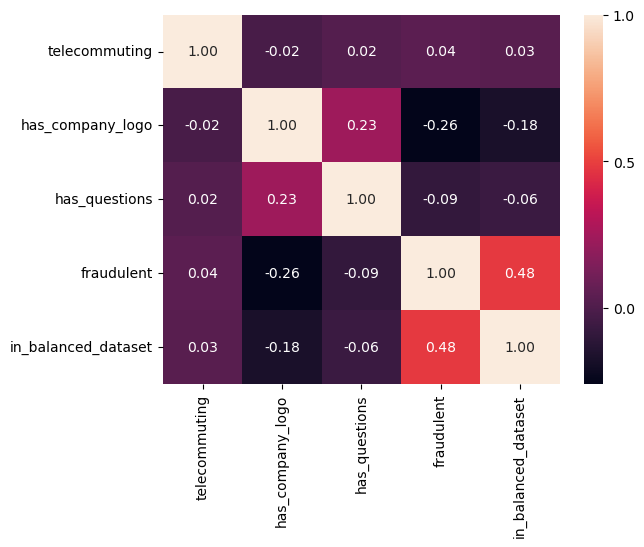

In [60]:

sns.heatmap(data=theft.corr(),annot=True,fmt='.2f')
sns.set(font_scale=3)

# For further analysis, considering the insights gained from these initial explorations.


In [61]:
missing_values = theft.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the result
print("Number of missing values in each column:")
print(missing_count)


Number of missing values in each column:
title                  0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
in_balanced_dataset    0
country                0
state                  0
city                   0
dtype: int64


In [62]:
theft

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,country,state,city
0,Marketing Intern,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",\nExperience with content management systems a...,Not Specified,0,1,0,Other,Internship,Not Specified,Information Technology and Services,Marketing,0,0,US,NY,New York
1,Customer Service - Cloud Video Production,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:\nYour key responsibil...,What you will get from us\nThrough being part ...,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0,NZ,,Auckland
2,Commissioning Machinery Assistant (CMA),Sales,0,\nValor Services provides Workforce Solutions ...,"Our client, located in Houston, is actively se...",\nImplement pre-commissioning and commissionin...,Not Specified,0,1,0,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,0,0,US,IA,Wever
3,Account Executive - Washington DC,Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"\n\nEDUCATION: Bachelor’s or Master’s in GIS, ...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,US,DC,Washington
4,Bill Review Manager,Sales,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager\nLOCATIO...,QUALIFICATIONS:\n\nRN license in the State of ...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,US,FL,Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:\n\nWill eat comprehensiv...,What can you expect from us?\nWe have an open ...,0,1,1,Full-time,Mid-Senior level,Not Specified,Computer Software,Sales,0,0,CA,ON,Toronto
17876,Payroll Accountant,Accounting,0,WebLinc is the e-commerce platform and service...,\nThe Payroll Accountant will focus primarily ...,\n- B.A. or B.S. in Accounting\n- Desire to ha...,\nHealth & Wellness\n\nMedical plan\nPrescript...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,0,US,PA,Philadelphia
17877,Project Cost Control Staff Engineer - Cost Con...,Sales,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,\nAt least 12 years professional experience.\n...,Not Specified,0,0,0,Full-time,Mid-Senior level,Not Specified,Information Technology and Services,Information Technology,0,0,US,TX,Houston
17878,Graphic Designer,Sales,0,Not Specified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,NG,LA,Lagos


## Handling text data

In [63]:
# Concatenating columns with textual information
theft['all_text'] = theft['title'] + ' ' + theft['company_profile'] + ' ' + theft['department'] + ' ' + theft['description'] + ' '  + theft['requirements'] + ' ' + theft['benefits']+ ' ' + theft['industry']+ ' ' + theft['function']+ ' ' + theft['employment_type']+ ' ' + theft['required_experience']+ ' ' + theft['required_education']+' ' + theft['country']+' ' + theft['state']+' ' + theft['city']+' ' + theft['salary_range']


In [64]:
theft.head(2)

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,country,state,city,all_text
0,Marketing Intern,Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",\nExperience with content management systems a...,Not Specified,0,1,0,...,Internship,Not Specified,Information Technology and Services,Marketing,0,0,US,NY,New York,"Marketing Intern We're Food52, and we've creat..."
1,Customer Service - Cloud Video Production,Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:\nYour key responsibil...,What you will get from us\nThrough being part ...,0,1,0,...,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0,NZ,,Auckland,Customer Service - Cloud Video Production 90 S...


In [65]:
# Dropping columns with individual textual data
theft = theft.drop(['title', 'company_profile', 'department', 'description', 'requirements', 'benefits','industry','function','salary_range','employment_type','required_experience','required_education','country','state','city','salary_range'], axis=1)
theft.head(2)

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text
0,0,1,0,0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,1,0,0,0,Customer Service - Cloud Video Production 90 S...


In [66]:
theft['all_text'] = theft['all_text'].str.lower()

In [67]:
theft.head(2)

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text
0,0,1,0,0,0,"marketing intern we're food52, and we've creat..."
1,0,1,0,0,0,customer service - cloud video production 90 s...


In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hitesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stop = stopwords.words('english')
theft['all_text'] = theft['all_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [70]:
theft.head(2)

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text
0,0,1,0,0,0,"marketing intern we're food52, we've created g..."
1,0,1,0,0,0,customer service - cloud video production 90 s...


In [71]:
theft['all_text'] = theft['all_text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
theft['all_text'] = theft['all_text'].str.replace(r'[\'-]', '')
theft['all_text'] = theft['all_text'].str.replace(r'[\'\",()*&^%$#@!~`+=|/<>?{}\[\]\/\\:;\_]]', ' ')
theft['all_text'] = theft['all_text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('url')]))
theft['all_text'] = theft['all_text'].apply(lambda x: ' '.join([word for word in x.split(' ') if len(word)<25]))
theft['all_text'] = theft['all_text'].map(lambda x: re.sub(r'\W+', ' ', x))
theft['all_text'] = theft['all_text'].str.replace(r'[0-9]', '')
theft['all_text'] = theft['all_text'].str.replace(r'[^a-z]', ' ')
theft.head(3)

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text
0,0,1,0,0,0,marketing intern were food weve created ground...
1,0,1,0,0,0,customer service cloud video production secon...
2,0,1,0,0,0,commissioning machinery assistant cma valor se...


## Text processing with lemmatizing

In [72]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [73]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/hitesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hitesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hitesh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [74]:
# Further text processing with lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in word_tokenize(text)]

theft['all_text'] = theft['all_text'].apply(lemmatize_text)
theft['all_text'] = [' '.join(map(str, l)) for l in theft['all_text']]
theft.head(3)

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text
0,0,1,0,0,0,marketing intern were food weve created ground...
1,0,1,0,0,0,customer service cloud video production second...
2,0,1,0,0,0,commissioning machinery assistant cma valor se...


In [75]:
# Calculating the character count 
theft['character_count'] = theft.all_text.apply(len)
theft[['all_text', 'character_count']]

,all_text,character_count
0,marketing intern were food weve created ground...,2112
1,customer service cloud video production second...,4147
2,commissioning machinery assistant cma valor se...,2094
3,account executive washington dc passion improv...,4528
4,bill review manager spotsource solution llc gl...,3290
...,...,...
17875,account director distribution vend looking awe...,3739
17876,payroll accountant weblinc ecommerce platform ...,3649
17877,project cost control staff engineer cost contr...,2228
17878,graphic designer specified sale nemsia studio ...,961


In [76]:
# Word_Count

In [77]:
# Calculate word count
theft['word_count'] = theft['all_text'].apply(lambda x: len(x.split()))

# Display the DataFrame with 'all_text' and 'word_count'
print(theft[['all_text', 'word_count']])

                                                all_text  word_count
0      marketing intern were food weve created ground...         275
1      customer service cloud video production second...         552
2      commissioning machinery assistant cma valor se...         247
3      account executive washington dc passion improv...         542
4      bill review manager spotsource solution llc gl...         396
...                                                  ...         ...
17875  account director distribution vend looking awe...         529
17876  payroll accountant weblinc ecommerce platform ...         472
17877  project cost control staff engineer cost contr...         271
17878  graphic designer specified sale nemsia studio ...         124
17879  web application developer vend looking awesome...         483

[17641 rows x 2 columns]


In [78]:
theft

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset,all_text,character_count,word_count
0,0,1,0,0,0,marketing intern were food weve created ground...,2112,275
1,0,1,0,0,0,customer service cloud video production second...,4147,552
2,0,1,0,0,0,commissioning machinery assistant cma valor se...,2094,247
3,0,1,0,0,0,account executive washington dc passion improv...,4528,542
4,0,1,1,0,0,bill review manager spotsource solution llc gl...,3290,396
...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,account director distribution vend looking awe...,3739,529
17876,0,1,1,0,0,payroll accountant weblinc ecommerce platform ...,3649,472
17877,0,0,0,0,0,project cost control staff engineer cost contr...,2228,271
17878,0,0,1,0,0,graphic designer specified sale nemsia studio ...,961,124


In [79]:
theft.drop(columns=['in_balanced_dataset'], inplace=True)

In [80]:
theft

,telecommuting,has_company_logo,has_questions,fraudulent,all_text,character_count,word_count
0,0,1,0,0,marketing intern were food weve created ground...,2112,275
1,0,1,0,0,customer service cloud video production second...,4147,552
2,0,1,0,0,commissioning machinery assistant cma valor se...,2094,247
3,0,1,0,0,account executive washington dc passion improv...,4528,542
4,0,1,1,0,bill review manager spotsource solution llc gl...,3290,396
...,...,...,...,...,...,...,...
17875,0,1,1,0,account director distribution vend looking awe...,3739,529
17876,0,1,1,0,payroll accountant weblinc ecommerce platform ...,3649,472
17877,0,0,0,0,project cost control staff engineer cost contr...,2228,271
17878,0,0,1,0,graphic designer specified sale nemsia studio ...,961,124


## Vectorizing the data

In [81]:
# pip install -U scikit-learn

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [83]:
vectorizer.fit(theft['all_text'])

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

## Splitting data into Training, Testing & Validation sets

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV data into a Pandas DataFrame
#data = pd.read_csv('cleaned_dataset.csv')

# Split the data into training (70%), testing (15%), and validation (15%) sets
train_data, test_val_data = train_test_split(theft, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_val_data, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print(f"Training Set Size: {len(train_data)}")
print(f"Testing Set Size: {len(test_data)}")
print(f"Validation Set Size: {len(val_data)}")

# Save the split datasets to new CSV files
train_data.to_csv('training_set.csv', index=False)
test_data.to_csv('testing_set.csv', index=False)
val_data.to_csv('validation_set.csv', index=False)


Training Set Size: 12348
Testing Set Size: 2646
Validation Set Size: 2647


In [85]:
train_data.head(4)

,telecommuting,has_company_logo,has_questions,fraudulent,all_text,character_count,word_count
3837,0,1,0,0,technician level i broadcast operation divisio...,1843,232
17444,0,1,1,0,structural cad designer d modeling specified d...,1511,182
8783,0,1,1,0,marketing manager ecar club entirely electric ...,4150,507
14206,0,1,1,0,senior digital account manager mindworks inter...,5597,711


In [86]:
test_data.head(4)

,telecommuting,has_company_logo,has_questions,fraudulent,all_text,character_count,word_count
512,0,1,1,0,english teacher abroad help teacher get safe s...,459,65
9388,0,1,1,0,python software developer roka security boutiq...,3444,424
1030,0,1,1,0,brand content marketer mailjet market leading ...,3202,427
12130,0,1,1,0,graduate client engineer founded team google s...,2522,362


In [87]:
val_data.head(4)

,telecommuting,has_company_logo,has_questions,fraudulent,all_text,character_count,word_count
8688,0,1,0,0,graduate summer work program limited opening a...,1610,222
9336,0,1,1,0,caregiver hha cna kalamazoo our mission client...,1086,142
15579,0,1,0,0,community ambassador spanishspeaking remote wa...,1178,154
4212,0,1,0,0,inside sale executive visahq hire diverse inte...,3769,464


## Split data common for models

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the split datasets
train_data = pd.read_csv('training_set.csv')
test_data = pd.read_csv('testing_set.csv')
val_data = pd.read_csv('validation_set.csv')

# Assuming 'fraudulent' is your target column
X_train = train_data.drop('fraudulent', axis=1)
y_train = train_data['fraudulent']

X_test = test_data.drop('fraudulent', axis=1)
y_test = test_data['fraudulent']

X_val = val_data.drop('fraudulent', axis=1)
y_val = val_data['fraudulent']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train['all_text'].astype('str'))
X_test_vectorized = vectorizer.transform(X_test['all_text'].astype('str'))
X_val_vectorized = vectorizer.transform(X_val['all_text'].astype('str'))

## Random Forest

### Finding the best parameters with the validation dataset using GridSearchCV

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define a smaller grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Enable parallelization with n_jobs
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_val_vectorized, y_val)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
## Traing and testing the model with best parameters


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.99
Recall: 0.59
F1-Score: 0.74


True Positives (TP): 78
True Negatives (TN): 2512
False Positives (FP): 1
False Negatives (FN): 55


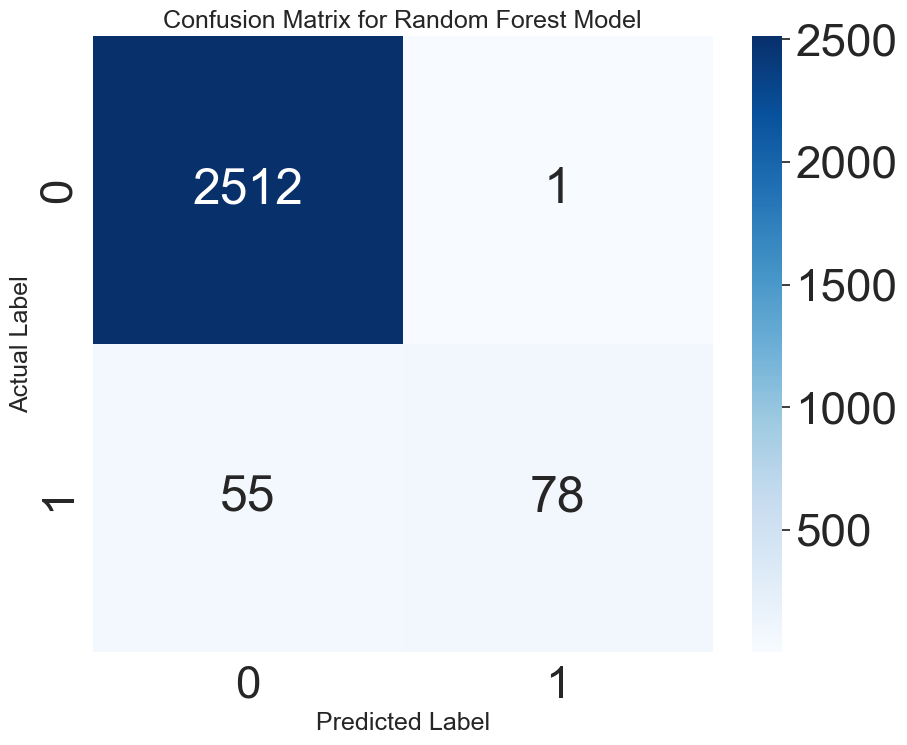

In [92]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label', size = 18)
plt.ylabel('Actual Label', size = 18)
plt.title('Confusion Matrix for Random Forest Model', size = 18)
plt.show()

## Logistic Regression

In [93]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test_vectorized)

# Evaluate the initial model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


### To improve the "Recall" and "F1-score", I'm adjusting the threshold to 0.3 

In [94]:
# Get predicted probabilities for class 1
y_pred_prob = logreg_classifier.predict_proba(X_test_vectorized)[:, 1]

# Adjust the threshold
new_threshold = 0.3  
y_pred_adjusted = (y_pred_prob >= new_threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.94
Recall: 0.64
F1-Score: 0.76


True Positives (TP): 85
True Negatives (TN): 2508
False Positives (FP): 5
False Negatives (FN): 48


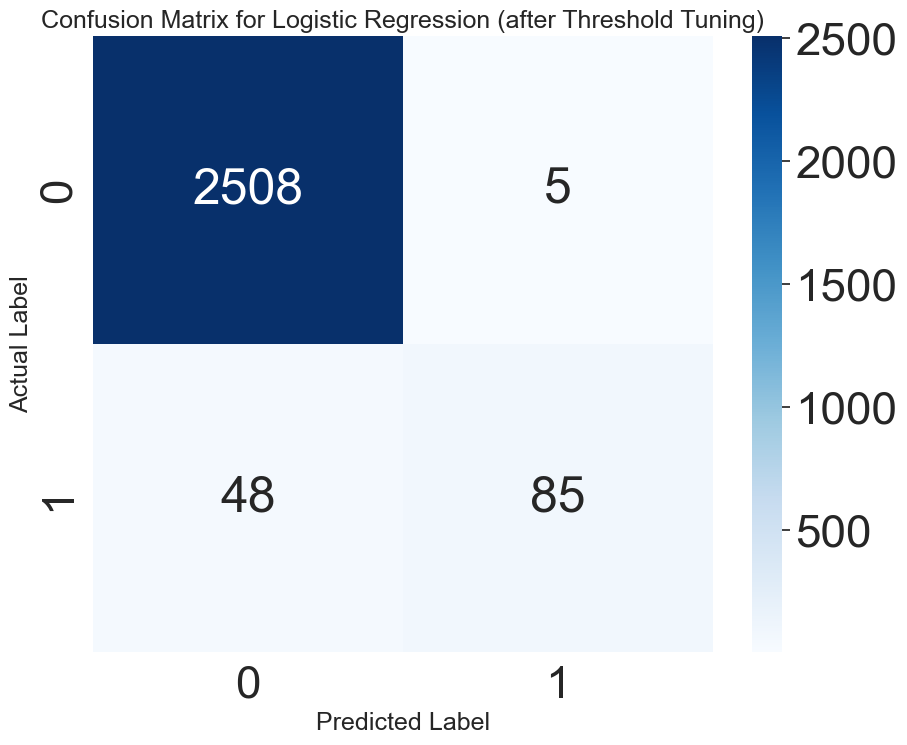

In [96]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label', size = 18)
plt.ylabel('Actual Label', size = 18)
plt.title('Confusion Matrix for Logistic Regression (after Threshold Tuning)', size = 18)
plt.show()

## K-NN (K-Nearest Neighbor)

In [97]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model on the training data
knn_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_vectorized)

# Evaluate the initial model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.98
Recall: 0.47
F1-Score: 0.64


True Positives (TP): 63
True Negatives (TN): 2512
False Positives (FP): 1
False Negatives (FN): 70


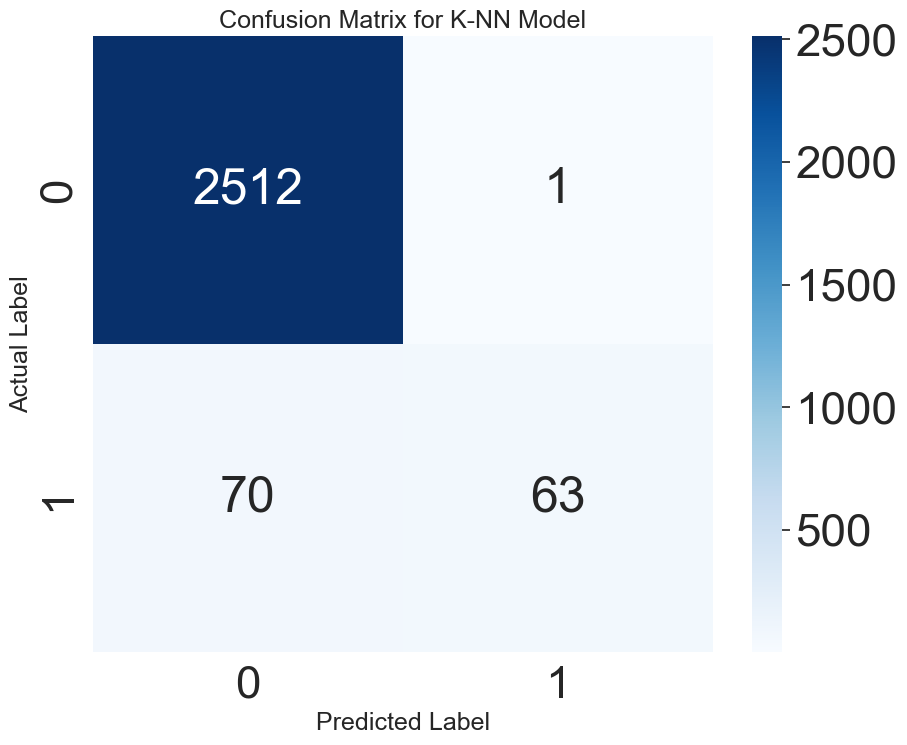

In [99]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label', size = 18)
plt.ylabel('Actual Label', size = 18)
plt.title('Confusion Matrix for K-NN Model', size = 18)
plt.show()

# Decission Tree classifer

In [100]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [101]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Fit the model on the training data with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test_vectorized)

# Evaluate the initial model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Test Accuracy: {accuracy:.2f}")


Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy: 0.98


In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.87
Recall: 0.65
F1-Score: 0.75


True Positives (TP): 87
True Negatives (TN): 2500
False Positives (FP): 13
False Negatives (FN): 46


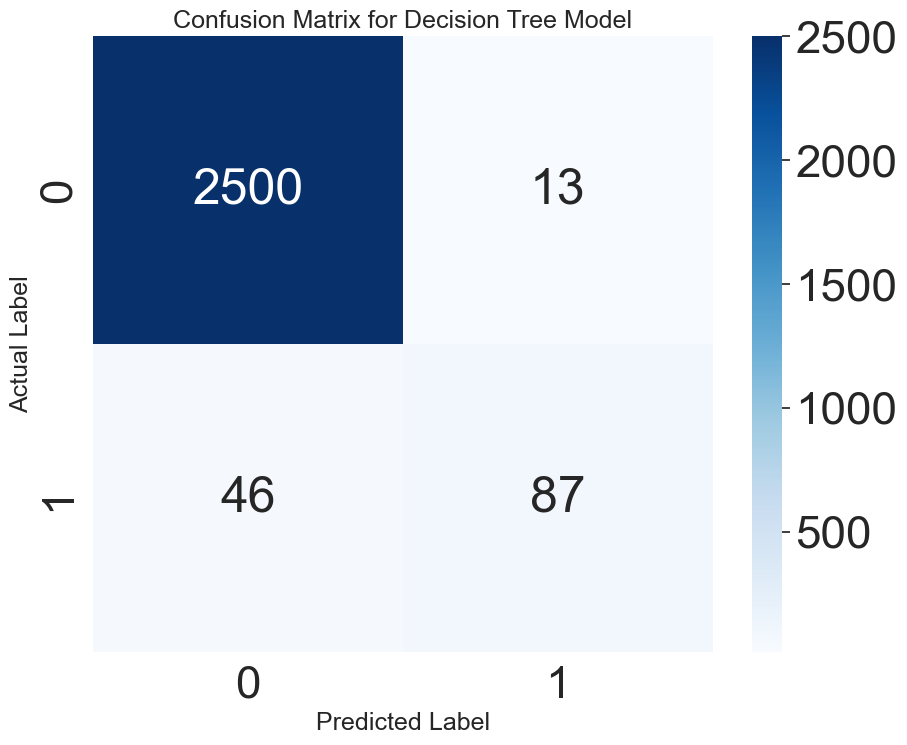

In [103]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label', size = 18)
plt.ylabel('Actual Label', size = 18)
plt.title('Confusion Matrix for Decision Tree Model', size = 18)
plt.show()

## SVM

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear',probability=True)

# svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_vectorized)

# Evaluate the initial model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.98


In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.98
Recall: 0.67
F1-Score: 0.79


True Positives (TP): 89
True Negatives (TN): 2511
False Positives (FP): 2
False Negatives (FN): 44


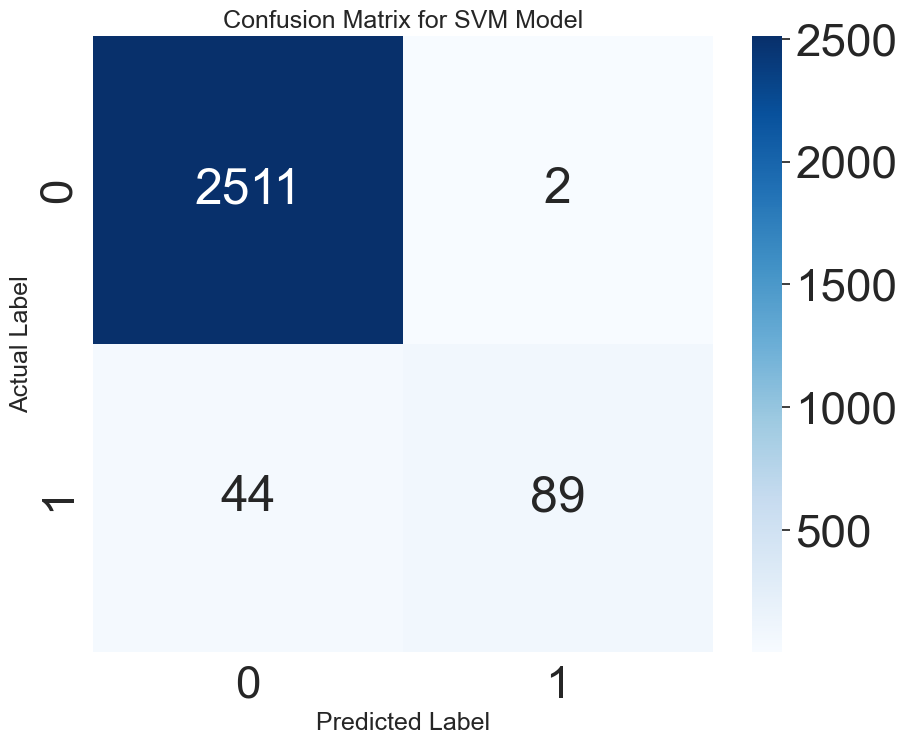

In [106]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Displaying TP, TN, FP, FN along with the confusion matrix
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label', size = 18)
plt.ylabel('Actual Label', size = 18)
plt.title('Confusion Matrix for SVM Model', size = 18)
plt.show()

In [107]:
svm_probs = svm_classifier.predict_proba(X_test_vectorized)[:, 1]

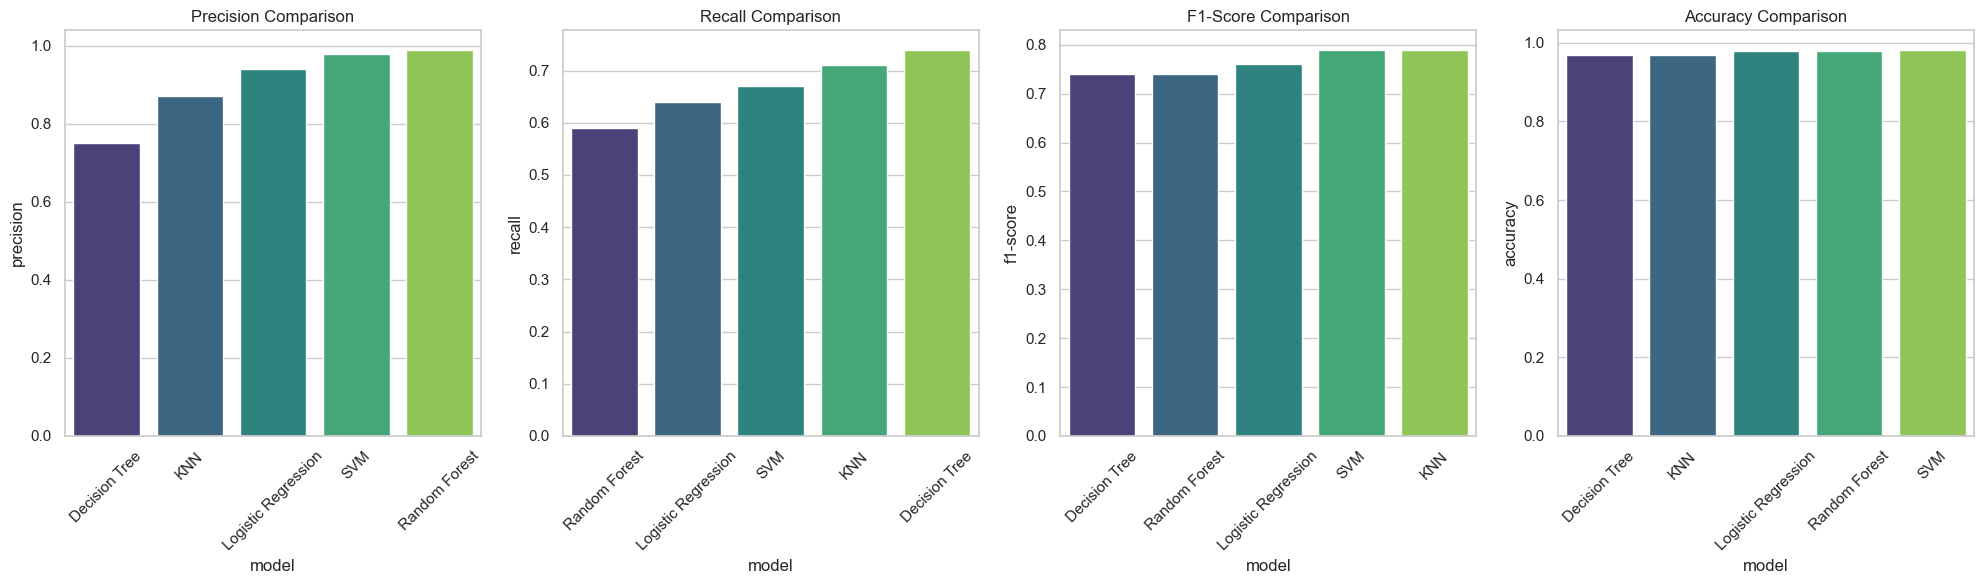

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification reports for SVM, Decision Tree, KNN, Logistic Regression, and Random Forest
svm_report = {'model': 'SVM', 'precision': 0.98, 'recall': 0.67, 'f1-score': 0.79, 'accuracy': 0.982615268329554}
dt_report = {'model': 'Decision Tree', 'precision': 0.75, 'recall': 0.74, 'f1-score': 0.74, 'accuracy': 0.97}
knn_report = {'model': 'KNN', 'precision': 0.87, 'recall': 0.71, 'f1-score': 0.79, 'accuracy': 0.97}
logistic_report = {'model': 'Logistic Regression', 'precision': 0.94, 'recall': 0.64, 'f1-score': 0.76, 'accuracy': 0.98}
rf_report = {'model': 'Random Forest', 'precision': 0.99, 'recall': 0.59, 'f1-score': 0.74, 'accuracy': 0.98}

# Convert the list of dictionaries to a DataFrame
df_reports = pd.DataFrame([svm_report, dt_report, knn_report, logistic_report, rf_report])

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the comparison
plt.figure(figsize=(20, 6))

# Bar plot for Precision
plt.subplot(1, 4, 1)
df_reports_precision = df_reports.sort_values(by='precision')
sns.barplot(x='model', y='precision', data=df_reports_precision, palette='viridis')
plt.title('Precision Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Recall
plt.subplot(1, 4, 2)
df_reports_recall = df_reports.sort_values(by='recall')
sns.barplot(x='model', y='recall', data=df_reports_recall, palette='viridis')
plt.title('Recall Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for F1-Score
plt.subplot(1, 4, 3)
df_reports_f1 = df_reports.sort_values(by='f1-score')
sns.barplot(x='model', y='f1-score', data=df_reports_f1, palette='viridis')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Accuracy
plt.subplot(1, 4, 4)
df_reports_accuracy = df_reports.sort_values(by='accuracy')
sns.barplot(x='model', y='accuracy', data=df_reports_accuracy, palette='viridis')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


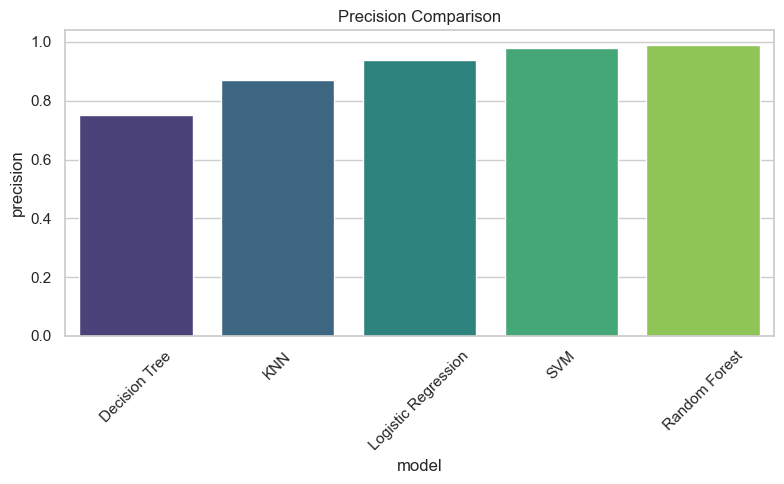

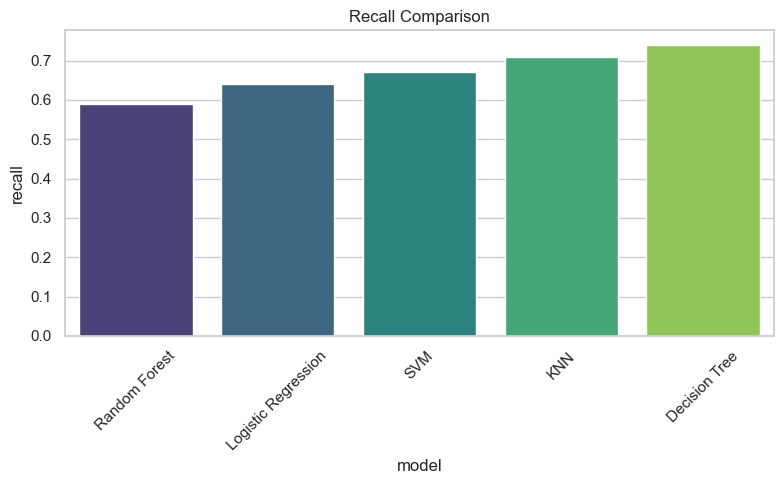

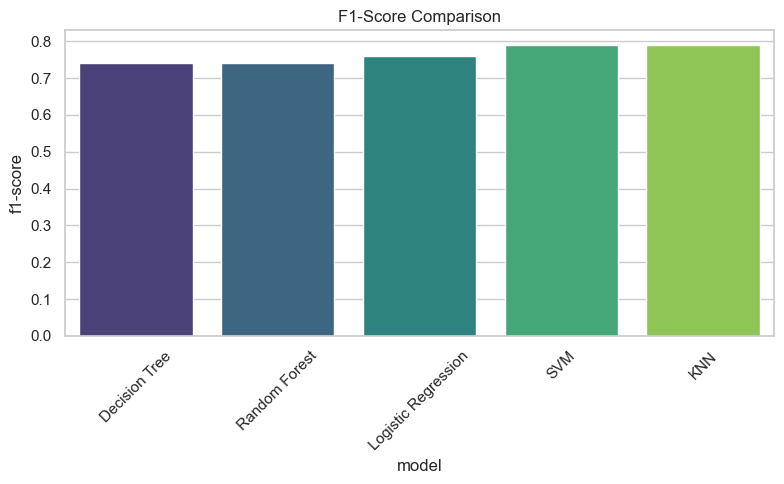

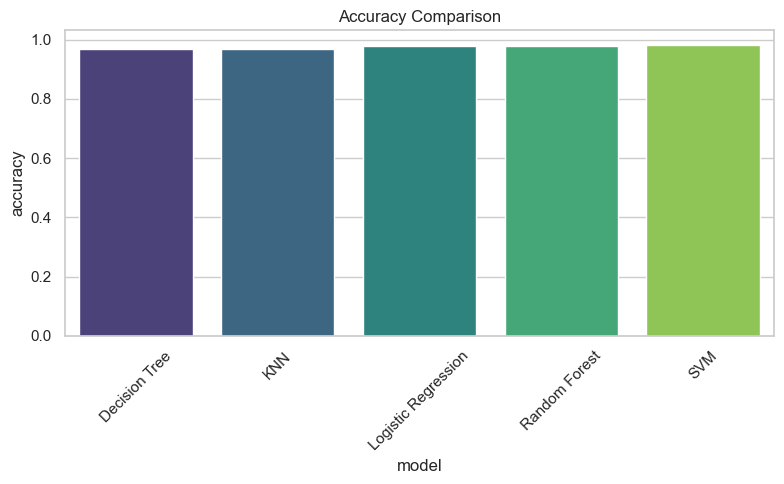

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Classification reports for SVM, Decision Tree, KNN, Logistic Regression, and Random Forest
svm_report = {'model': 'SVM', 'precision': 0.98, 'recall': 0.67, 'f1-score': 0.79, 'accuracy': 0.982615268329554}
dt_report = {'model': 'Decision Tree', 'precision': 0.75, 'recall': 0.74, 'f1-score': 0.74, 'accuracy': 0.97}
knn_report = {'model': 'KNN', 'precision': 0.87, 'recall': 0.71, 'f1-score': 0.79, 'accuracy': 0.97}
logistic_report = {'model': 'Logistic Regression', 'precision': 0.94, 'recall': 0.64, 'f1-score': 0.76, 'accuracy': 0.98}
rf_report = {'model': 'Random Forest', 'precision': 0.99, 'recall': 0.59, 'f1-score': 0.74, 'accuracy': 0.98}

# Convert the list of dictionaries to a DataFrame
df_reports = pd.DataFrame([svm_report, dt_report, knn_report, logistic_report, rf_report])

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the comparison for Precision
plt.figure(figsize=(8, 5))
df_reports_precision = df_reports.sort_values(by='precision')
sns.barplot(x='model', y='precision', data=df_reports_precision, palette='viridis')
plt.title('Precision Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot the comparison for Recall
plt.figure(figsize=(8, 5))
df_reports_recall = df_reports.sort_values(by='recall')
sns.barplot(x='model', y='recall', data=df_reports_recall, palette='viridis')
plt.title('Recall Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot the comparison for F1-Score
plt.figure(figsize=(8, 5))
df_reports_f1 = df_reports.sort_values(by='f1-score')
sns.barplot(x='model', y='f1-score', data=df_reports_f1, palette='viridis')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot the comparison for Accuracy
plt.figure(figsize=(8, 5))
df_reports_accuracy = df_reports.sort_values(by='accuracy')
sns.barplot(x='model', y='accuracy', data=df_reports_accuracy, palette='viridis')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
